In [13]:
install.packages("tidyr")

also installing the dependencies 'rlang', 'dplyr'

Warning message:
"package 'dplyr' is in use and will not be installed"

package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\Henrique\Anaconda3\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\Henrique\Anaconda3\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'tidyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\RtmponNWEJ\downloaded_packages


In [1]:
library(srvyr)
library(ggplot2)
library(ggpubr)
library(dplyr)
library(knitr)
# library(tidyr)
library(dummies)
library(mlr)
library(caret)
library(brazilmaps)
library(AER)

Warning message:
"package 'srvyr' was built under R version 3.6.3"
Attaching package: 'srvyr'

The following object is masked from 'package:stats':

    filter

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'ggpubr' was built under R version 3.6.3"Loading required package: magrittr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

dummies-1.5.6 provided by Decision Patterns

Warning message:
"package 'mlr' was built under R version 3.6.3"Loading required package: ParamHelpers
Warning message:
"package 'ParamHelpers' was built under R version 3.6.3"'mlr' is in maintenance mode since July 2019. Future development
efforts will go into its successor 'mlr3' (<https://mlr3.mlr-org.com>).
Warning message:
"package 'caret' was bui

ERROR: Error: package or namespace load failed for 'caret' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 0.3.4 is already loaded, but >= 0.4.0 is required


# Introdução

## R Markdown

## Leitura e preparação dos dados

Os dados da Pesquisa Nacional de Saúde 2013 são disponibilizados pelo IBGE no seu site. 

**É importante lembrar que os dados relacionados a diabetes consideram pessoas com 18 anos ou mais**; por isso, o total de pessoas não é exatamente a população brasileira, isto é, perto de 200 milhões. mas é aproximadamente 143 milhões, com os dados de 2013.

In [2]:
#ajustar como os resutados serão mostrados
options( survey.lonely.psu = "adjust" )

library(survey)

#importando a biblioteca.
pns_design <- readRDS(file.path(path.expand( ".." ) ,
                                "databases",
                                "2013 long questionnaire survey design.rds" ))

Loading required package: grid
Loading required package: Matrix
Loading required package: survival

Attaching package: 'survey'

The following object is masked from 'package:graphics':

    dotchart



### Variáveis interessantes para análise

Variáveis Demográficas e Pessoais:

* `c006` - Sexo:
    + `1` - masculino
    + `2` - feminino
* `c009` - Cor ou Raça
   + `1` - Branca
   + `2` - Preta
   + `3` - Amarela
   + `4` - Parda
   + `5` - Indígena
   + `9` - Ignorado
* `d009` - curso mais avançado que cursou?
   + `01` - Classe de alfabetização – CA 
   + `02` - Alfabetização de jovens e adultos
   + `03` - Antigo primário (elementar)
   + `04` - Antigo ginásio (médio 1º ciclo)
   + `05` - Regular do ensino fundamental ou do 1º grau 
   + `06` - Educação de jovens e adultos (EJA) ou supletivo do ensino fundamental
   + `07` - Antigo científico, clássico etc. (médio 2º ciclo)
   + `08` - Regular do ensino médio ou do 2º grau
   + `09` - Educação de jovens e adultos (EJA) ou supletivo do ensino médio
   + `10` - Superior - graduação
   + `11` - Mestrado
   + `12` - Doutorado
   + `  ` - Não aplicável

Variáveis de Estilo de vida:

* `p009` - quantos dias na semana o indivíduo come vegetais
* `p018` - quantos dias na semana o indivíduo come frutas
* `p020` - quantos dias na semana o indivíduo consome regrigerantes e sucos industriais
* `p025` - quantos dias na semana o indivíduo come alimentos doces(bolos, tortas, chocolates...)
* `p026` - quantos dias na semana o indivíduo substitui almoço ou janta por sanduiches, salgados ou pizzas.
* `p028` - quantos dias na semana o indivíduo consome bebidas alcoolicas
* `p035`  - quantos dias por semana costuma praticar exerc físico ou esporte
* `w00103` - peso final (medido) (kg)
* `w00203` - altura final (medido) (cm)

Variáveis de Doenças Crônicas

* `Q002`	- Algum médico já lhe deu o diagnóstico de hipertensão arterial (pressão alta)?
   + `1` - Sim
   + `2` - Apenas durante a gravidez
   + `3` - Não
            Não aplicavel
* `Q029`	- Quando foi a última vez que o(a) Sr(a) fez exame de sangue para medir a glicemia, isto é, o açúcar no sangue?
   + `1` - Há menos de 6 meses
   + `2` - Entre 6 meses  e menos de 1 ano
   + `3` - Entre 1 ano e menos de 2 anos
   + `4` - Entre 2 anos e menos de 3 anos
   + `5` - Há 3 anos ou mais
   + `6` - Nunca fez
            Não aplicavel
* `Q030`	- Algum médico já lhe deu o diagnóstico de diabetes? (CLASSE A SER PREDITA)
   + `1` - Sim
   + `2` - Apenas durante a gravidez (só para mulheres)
   + `3` - Não
            Não aplicavel
* `Q031`	- Que idade o(a) Sr(a) tinha no primeiro diagnóstico de diabetes? (0 =  Menos de 1 ano) (Branco = Não aplicável)
* `Q060`	- Algum médico já lhe deu o diagnóstico de colesterol alto?
   + `1` - Sim
   + `2` - Não
            Não aplicavel
* `Q068`	- Algum médico já lhe deu o diagnóstico de AVC (Acidente Vascular cerebral) ou derrame?
   + `1` - Sim
   + `2` - Não
            Não aplicavel
* `Q124`	- Algum médico já lhe deu o diagnóstico de insuficiência renal crônica?
   + `1` - Sim
   + `2` - Não
            Não aplicavel
* `R039`	-R39. Durante a sua vida, a sra já ficou grávida (mesmo que a gravidez não tenha chegado até o final)?
   + `1` - Sim
   + `2` - Não
            Não aplicavel

Variáveis de Identificação e controle

* `V0001`	-V0001. Unidade da Federação
* `V0026`	-V0026. Tipo de situação censitária



In [3]:
#adiciona a sintaxe dplyr de manipulação de dados ao pacote survey
pns_design_srvyr <- as_survey_design(pns_design)

## Criação de variáveis adicionais

### IMC -- Índice de Massa Corporal

Ao invés de utilizarmos diretamente o peso como uma variável de comparação, vamos utilizar o Índice de Massa Corporal (IMC), definido como: 

$$\mbox{IMC} = \frac{\mbox{peso}}{\mbox{altura}^2}$$

In [4]:
pns_design_srvyr <- pns_design_srvyr %>% mutate(imc = w00103/(w00203/100*w00203/100)) 

Vamos considerar também as faixas do IMC definidas pela Organização Mundial da Saúde, conforme mostrado na tabela a seguir:

Classificação        |  Faixa de Peso    |       Sintomas
---------------------|-------------------|----------------------------------------------------
Muito abaixo do peso |16 a 16,9 kg/m2    | Queda de cabelo, infertilidade, ausência menstrual
Abaixo do peso       |17 a 18,4 kg/m2    | Fadiga, stress, ansiedade
Peso normal          |18,5 a 24,9 kg/m2  | Menor risco de doenças cardíacas e vasculares
Acima do peso        |25 a 29,9 kg/m2    | Fadiga, má circulação, varizes
Obesidade Grau I     |30 a 34,9 kg/m2    | Diabetes, angina, infarto, aterosclerose
Obesidade Grau II    |35 a 40 kg/m2      | Apneia do sono, falta de ar
Obesidade Grau III   |maior que 40 kg/m2 | Refluxo, dificuldade para se mover, escaras, diabetes, infarto, AVC

In [5]:
pns_design_srvyr <- pns_design_srvyr %>% 
     mutate(imcclass = case_when(imc < 17.0 ~ "1",
                                 imc >= 17.0 & imc < 18.5 ~ "2",
                                 imc >= 18.5 & imc < 25.0 ~ "3",
                                 imc >= 25.0 & imc < 30.0 ~ "4",
                                 imc >= 30.0 & imc < 35.0 ~ "5",
                                 imc >= 35.0 & imc < 40.0 ~ "6",
                                 imc >= 40.0 ~ "7"
                                 ))


### Faixa etária

Uma outra classificação interessante é por faixa etária. Temos uma classificação publicada pela Revista Exame no artigo de Novembro de 2016 baseado nos dados da PNAD 2015  [Um retrato do Brasil e do brasileiro, segundo o IBGE](https://exame.abril.com.br/brasil/um-retrato-do-brasil-e-do-brasileiro-segundo-o-ibge/)

No artigo mencionado são considerados os seguintes grupos etários:

Faixa   |   Classe Aqui
--------|-----------------
0--4    |  2
5--9    |  7
10--14  |  12
15--19  |  18
20--24  |  22
25--39  |  32
40--59  |  50
60+     |  60

In [4]:
# Criando uma variavel de faixa etaria
pns_design_srvyr <- pns_design_srvyr %>% mutate(idade = as.numeric(c008))
pns_design_srvyr <- pns_design_srvyr %>% 
     mutate(fxetaria = case_when(idade <   5.0 ~ "2",
                                 idade >=  5.0 & idade < 10.0 ~ "7",
                                 idade >= 10.0 & idade < 15.0 ~ "12",
                                 idade >= 15.0 & idade < 20.0 ~ "18",
                                 idade >= 20.0 & idade < 25.0 ~ "22",
                                 idade >= 25.0 & idade < 40.0 ~ "32",
                                 idade >= 40.0 & idade < 60.0 ~ "50",
                                 idade >= 60.0 ~ "60"))

### Faixa de escolaridade

Mais uma classificação que queremos observar é a Faixa de escolaridade da população. Então os dados foi organizado da seguinte forma:

Faixa  | Nova Classe |   Classe Anterior
------|--|-----------------
0  | Não possui histórico escolar  |  Não Aplicável
1  |  Concluiu até o ensino fundamental   |  Classe de alfabetização – CA , Alfabetização de jovens e adultos, Antigo primário (elementar), Regular do ensino fundamental ou do 1º grau, Educação de jovens e adultos (EJA) ou supletivo do ensino fundamental
2  |  Concluiu até o ensino médio  |  Antigo ginásio (médio 1º ciclo), Antigo científico, clássico etc. (médio 2º ciclo), Regular do ensino médio ou do 2º grau, Educação de jovens e adultos (EJA) ou supletivo do ensino médio
3  |  Superior - Graduação|  Superior - graduação
4  | Mestrado |  Mestrado
5  | Doutorado |  Doutorado

In [7]:
# Criando uma variavel de faixa de escolaridade
pns_design_srvyr <- pns_design_srvyr %>% 
     mutate(fx_esc = case_when(d009 == "  " ~ "0",
                               d009 == "01" | d009 == "02" | d009 == "03" | d009 == "05" |  d009 == "06"  ~ "1", # ensino fundamental
                               d009 == "04" | d009 == "07" | d009 == "08" | d009 == "09" ~ "2", # ensino médio
                               d009 == "10" ~ "3", # ensino superior
                               d009 == "11" ~ "4", # mestrado
                               d009 == "12" ~ "5" )) #doutorado

### Frequência de Atividade Física

Para permitir uma melhor análise da relação da atividade física com a diabetes, criamos uma nova variável que permita relacionar a frequência de modo direto, já que a variável original `m016` apresenta uma codificação não invertida.

Valor Original    |      Codificação Original         | Novo Valor    | Codificação Variável `freqativ`
------------------|-----------------------------------|---------------|----------------------------------------
 1                |  mais de uma vez por semana       |     5         |  mais de uma vez por semana
 2                |  uma vez por semana               |     4         |  uma vez por semana
 3                |  de 2 a 3 vezes por mês           |     3         |  de 2 a 3 vezes por mês
 4                |  algumas vezes no ano             |     2         |  algumas vezes no ano
 5                |  uma vez no ano                   |     1         |  uma vez no ano
 6                |   nenhuma vez                     |     0         |  nenhuma vez

In [8]:

pns_design_srvyr <- pns_design_srvyr %>% mutate(freqativ = case_when(m016 == 6 ~ 0, # Nenhuma vez
                                                                     m016 == 5 ~ 1, # Uma vez/ano
                                                                     m016 == 4 ~ 2, # Algumas vezes/ano
                                                                     m016 == 3 ~ 3, # 2-3 vezes/mes
                                                                     m016 == 2 ~ 4, # Uma vez/semana
                                                                     m016 == 1 ~ 5, # Mais de uma vez/semana
                                                                     ))



## Tabulações

### Prevalência de pessoas com diabetes

Para verificarmos se nossas métricas estão corretas, buscamos referência sobre a análise de diabetes pela PNS através de outras fontes:
   
>**No Brasil, conforme narra o artigo, dados recentes da Pesquisa Nacional em Saúde (PNS) de 2013 estimou a prevalência de Diabetes Mellitus em 6,2% dos participantes com 18 anos ou mais.**
   
Fiocruz:
   https://portal.fiocruz.br/noticia/diabetes-pesquisa-avalia-os-fatores-associados-qualidade-de-vida

A Fundação Oswaldo Cruz (Fiocruz) foi uma das responsáveis em parceria com o Instituto Brasileiro de Geografia e Estatística(IBGE) pela PNS. Esse valor demonstra a consistência das nossas análises como vemos no gráfico abaixo onde a taxa de diabéticos correspondeu ao do estudos publicados pela Fiocruz.
   
Utilizamos a variável `q030` que identifica se o participante já foi diagnosticado com Diabetes por algum médico. Os valores `não aplicável` demonstra as pessoas que nunca fizeram exames de sangue, definidas pela variável `q029` que pergunta quando foi a última vez que a pessoa fez exame de sangue. 


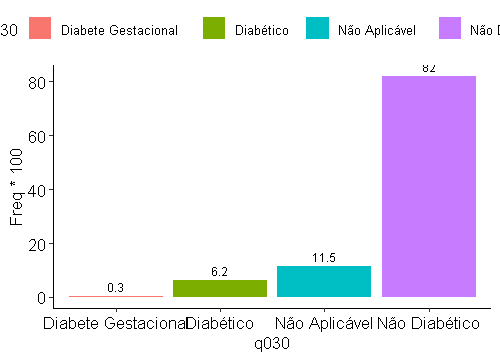

In [12]:
# q030 variável de diagnostico de diabetes
tir <- survey::svytable(~ q030, pns_design_srvyr)
tir.df <- as.data.frame(tir)
tir.df$q030 <- c("Não Aplicável", "Diabético", "Diabete Gestacional", "Não Diabético")
tir.df$Freq <- tir.df$Freq / sum(tir.df$Freq) 

options(repr.plot.width = 5, repr.plot.height = 3.6, repr.plot.res = 100)    
p <-ggplot(data=tir.df, aes(x=q030, y=Freq*100, fill = q030)) +
  geom_bar(stat="identity") +
  geom_text(aes(label=round(Freq*100, digits = 1)), vjust=-0.5, color="black", size=3)+ 
  labs_pubr() + theme_pubr()
p


### Porcentagem de Diagnóstico de Diabetes por sexo

Realizando uma análise mais específica, obtivemos também consistência nos dados que dizem a respeita da taxa de diabéticos em relação ao sexo, como resultado obtivemos uma taxa de 5,4% para os homens e 7% para as mulheres. Para verificar a consistência dos dados utilizamos um artigo científico publicado na biblioteca virtual de saúde (SciELO).  
   
Para o cálculo utilizamos a variável `c006` que representa o sexo do entrevistado e a variável `q030` utilizada na análise anterior.
   
Artigo:
   http://www.scielo.br/scielo.php?pid=s2237-96222015000200305&script=sci_abstract&tlng=pt
   

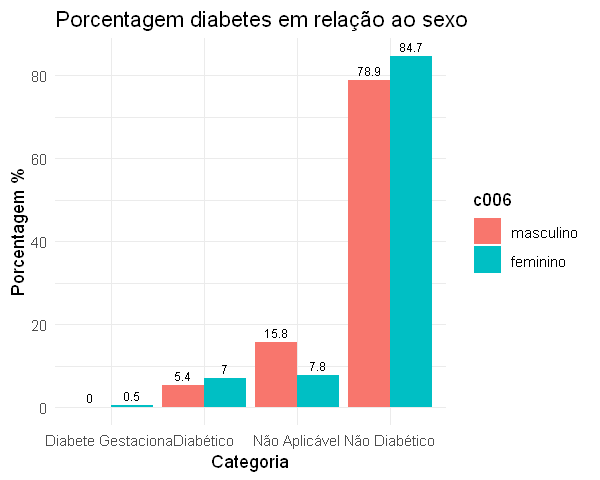

In [9]:

# c006 variavel do sexo do individuo

diab_sexo <- survey::svytable(~ q030 + c006, pns_design_srvyr)
diab_sexo.df <- as.data.frame(diab_sexo)


diab_sexo.df[diab_sexo.df$c006 == "masculino",c("Freq")] <- diab_sexo.df[diab_sexo.df$c006 == "masculino",c("Freq")]/sum(diab_sexo.df[diab_sexo.df$c006 == "masculino",c("Freq")] )
                                                                                                         diab_sexo.df[diab_sexo.df$c006 == "feminino",c("Freq")] <- diab_sexo.df[diab_sexo.df$c006 == "feminino",c("Freq")]/sum(diab_sexo.df[diab_sexo.df$c006 == "feminino",c("Freq")] )                                 
                                                                                       
diab_sexo.df$q030 <-  c("Não Aplicável", "Diabético", "Diabete Gestacional", "Não Diabético", "Não Aplicável", "Diabético", "Diabete Gestacional", "Não Diabético")

options(repr.plot.width = 5, repr.plot.height = 4)                                                                                              
p1 <-ggplot(data=diab_sexo.df, aes(x=q030, y=Freq*100 ,fill=c006)) +
  geom_bar(position="dodge", stat="identity") +
  geom_text(aes(label=round(Freq*100, digits = 1)), position=position_dodge(width=0.9), vjust=-0.5, color="black", size=2.5)+
  theme_minimal()+
  ggtitle("Porcentagem diabetes em relação ao sexo") +
  xlab("Categoria") + ylab("Porcentagem %") 


p1


### Procentagem de diabéticos por Faixa Etária

Analisando a população brasileira por faixa etária e considerando apenas pessoas com 60 anos ou mais, obtivemos uma taxa de 18,1% do total dessa população-alvo com o diagnóstico de diabetes. Utilizando como referência o atlas do IDF de 2017 que utiliza a população acima dos 65 anos de idade que contabiliza um total de 19% de diabéticos, chegamos a valores muito próximos.

fonte:
   https://www.diabetes.org.br/profissionais/images/2018/poster-atlas-idf-2017.pdf

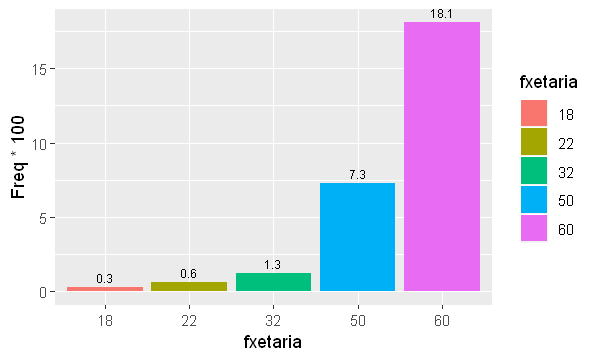

In [15]:

fxetaria_diab.df = as.data.frame(survey::svytable(~fxetaria + q030, pns_design_srvyr))

grp <- group_by(fxetaria_diab.df, fxetaria) %>% summarise(freq = sum(Freq))

fxetaria_diab.df <- fxetaria_diab.df[fxetaria_diab.df$q030 == "1",]

fxetaria_diab.df$Freq <- fxetaria_diab.df$Freq/grp$freq

fxetaria_diab.df <- fxetaria_diab.df[-2]

options(repr.plot.width = 5, repr.plot.height = 3)
p <- ggplot(data=fxetaria_diab.df, aes(x=fxetaria, y=Freq * 100, fill = fxetaria)) +     
   geom_bar( stat = "identity",  position = "dodge")+  geom_text(aes(label=round(Freq*100, digits = 1)), 
   position=position_dodge(width=0.9), vjust=-0.5, color="black", size=2.5)

p


### Taxa de diabéticos por frequencia de atividade física

   Um dos fatores preditores que podem indicar se uma pessoa é propensa ou não a desenvolver a diabetes é se ela pratica ou não atividade física. Mais de 80% dos diabéticos não praticam atividades físicas, mas vemos que há um aumento dos diabéticos que mantém uma frequencia de 1 vez por semana ou mais. 
   Como demonstrado no artigo abaixo, realizar atividades físicas é essencial para ajudar no bom controle da doença e garantir uma boa qualidade de vida. 
   
Artigo:
   https://www.diabetes.org.br/publico/meu-esporte-minha-vida/965-atividade-fisica-e-diabetes

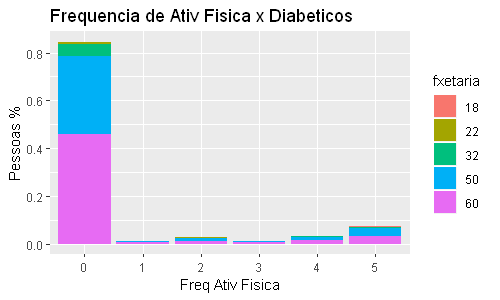

In [17]:
freq_diab <- survey::svytable(~ q030 + freqativ + fxetaria , pns_design_srvyr)
freq_diab.df <- as.data.frame(freq_diab)

freq_diab.df <- freq_diab.df[freq_diab.df$q030 == '1',]

freq_diab.df$Freq <- freq_diab.df$Freq/sum(freq_diab.df$Freq)    

options(repr.plot.width = 5, repr.plot.height = 3)
g <- ggplot(data = freq_diab.df) + 
   geom_bar(aes(x = freqativ, y = Freq, fill=fxetaria ), stat = "identity") +
   labs(x = "Freq Ativ Fisica",y = "Pessoas %", title = "Frequencia de Ativ Fisica x Diabeticos") 
g


## Taxa de diabéticos por região e por situação censitária


In [18]:

dist_populacao <- as.data.frame(survey::svytable(~region + v0026, pns_design_srvyr ))

pop_aux1 <- dist_populacao[dist_populacao$v0026 == 1,]
colnames(pop_aux1) <- c("Regiao", "Urbano", "Freq_Urbano")

pop_aux2 <- dist_populacao[dist_populacao$v0026 == 2,]
colnames(pop_aux2) <- c("Regiao", "Rural", "Freq_Rural")

dist_populacao <- cbind(pop_aux1,pop_aux2[, c("Rural", "Freq_Rural")])

dist_populacao$total <- dist_populacao$Freq_Urbano + dist_populacao$Freq_Rural

dist_populacao[,c("Regiao", "Freq_Urbano", "Freq_Rural")]


Regiao,Freq_Urbano,Freq_Rural
Norte,8519136,2366831.9
Nordeste,29696279,9251295.4
Sudeste,59677481,4397201.2
Sul,18410830,3213833.5
Centro-Oeste,9828695,946873.7


   Dos aproximadamente 146 milhões de brasileiros acima de 18 anos, cerca de 64 milhões(44%) estão no sudeste, isso implica que a quantidade de diabéticos nessa região vai muito maior do que as outras regiões como vemos no gráfico abaixo. Cerca de 49,7% dos diabéticos residem no sudeste brasileiro.


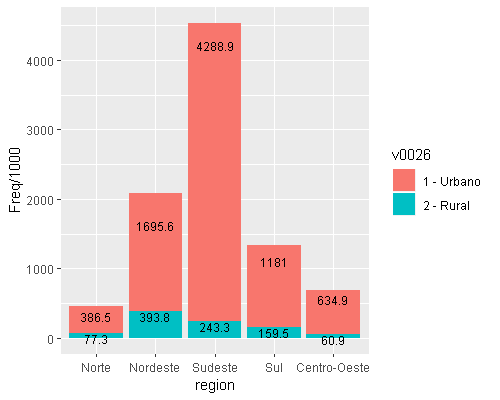

In [19]:
#* `Q030`	- Algum médico já lhe deu o diagnóstico de diabetes?
#   + `1` - Sim
#region
diab_estados <- survey::svytable(~ q030 + region + v0026, pns_design_srvyr )
diab_estados.df <- as.data.frame(diab_estados)

diab_estados.df <- diab_estados.df[diab_estados.df$q030 == '1',]
#diab_estados.df$Freq <- diab_estados.df$Freq / sum(diab_estados.df$Freq)

diab_estados.df$v0026 = as.character(diab_estados.df$v0026)
diab_estados.df$v0026[diab_estados.df$v0026 == 1]  = "1 - Urbano"
diab_estados.df$v0026[diab_estados.df$v0026 == 2]  = "2 - Rural"

options(repr.plot.width = 5, repr.plot.height = 4)
p <-ggplot(data=diab_estados.df, aes(x=region, y=Freq/1000, fill=v0026)) +
  geom_bar(stat="identity") +
  geom_text(aes(label=round(Freq/1000, digits = 1)), vjust=1, color="black", size=3)
p


## Distribuição das taxas de diabéticos por estado

ARTIGO

   Como demonstrado no artigo acima as maiores taxas de diabéticos do Brasil estão em Mato Grosso do Sul, São Paulo e Rio Grande do Sul respectivamente. Esses dados correspondem com as taxas demonstrados no gráfico abaixo.

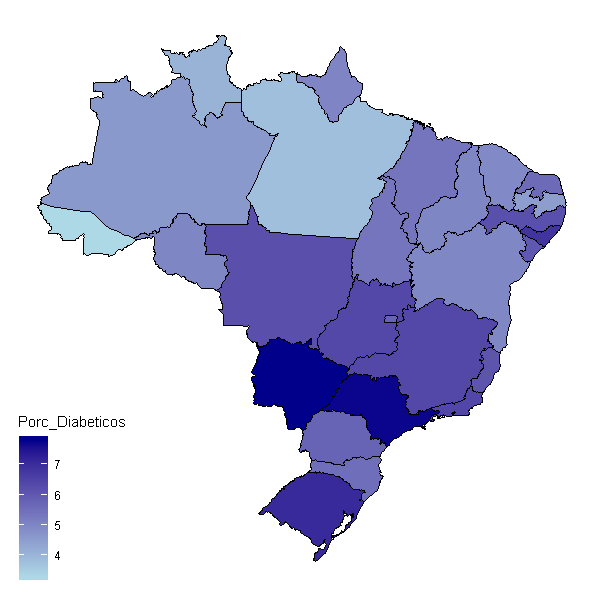

In [6]:
#* `Q030`	- Algum médico já lhe deu o diagnóstico de diabetes?
#   + `1` - Sim
#   + V0001 - Unidade da Federação
# install.packages("brazilmaps")
library(brazilmaps)
mapa <- get_brmap("State")

diab_estados <- as.data.frame(survey::svytable(~ v0001 + q030 , pns_design_srvyr))
qtd_estados = aggregate(diab_estados$Freq, by=list(Category=diab_estados$v0001), FUN=sum)

diab_estados <- diab_estados[diab_estados$q030 == 1,]

diab_estados$Porcent <- diab_estados$Freq / qtd_estados$x


teste <- toupper(c("Rondônia","Acre","Amazonas","Roraima","Pará","Amapá","Tocantins","Maranhão","Piauí","Ceará",
          "Rio Grande do Norte","Paraíba","Pernambuco","Alagoas","Sergipe","Bahia","Minas Gerais","Espírito Santo","Rio de Janeiro","São Paulo","Paraná","Santa Catarina","Rio Grande do Sul","Mato Grosso do Sul",
          "Mato Grosso","Goiás","Distrito Federal"))

porc_est <- as.data.frame(teste)
porc_est$Porc_Diabeticos <- diab_estados$Porcent * 100
##
##uf_map <- get_brmap("State") %>% 
#  inner_join(porc_est, c("nome" = "teste"))

#uf_map %>% 
#  ggplot(aes(fill = Porcent)) +
#  geom_sf() +
#  scale_fill_continuous(low = "lightblue", high = "darkblue") 

options(repr.plot.width = 5, repr.plot.height = 5)
plot_brmap(get_brmap("State"), data_to_join = porc_est, join_by = c("nome" = "teste"),
var = "Porc_Diabeticos") + scale_fill_continuous(low = "lightblue", high = "darkblue") 


## Distribuição da idade de diagnóstico de Diabéticos

Temos o gráfico que demonstra a idade que as pessoas foram diagnosticadas com a doença. Acima dos 30 anos é que os diagnósticos são mais realizados e tendo seu pico próximo aos 50 anos. Como idade é um dos fatores preditivos, faz sentido que com o passar dos anos a quantidade de diagnósticos aumente.

In [24]:
pns_design_srvyr$variables$q031 <- ifelse(pns_design_srvyr$variables$q031 == '00', pns_design_srvyr$variables$c008, pns_design_srvyr$variables$q031)

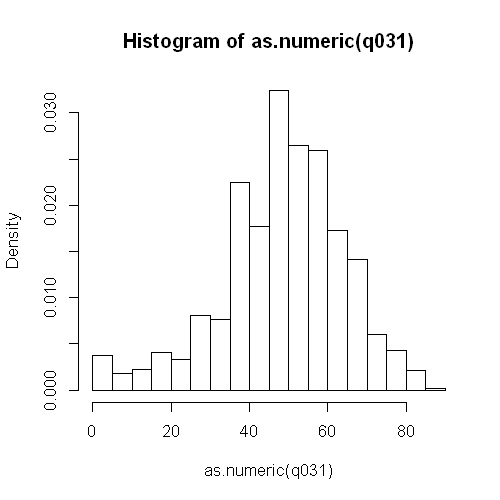

In [25]:
survey::svyhist(~as.numeric(q031), subset(pns_design_srvyr, q030==1))
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 100)
dens <- survey::svysmooth(~as.numeric(q031), subset(pns_design_srvyr, (q030==1) & (q030!=" ")))

## Distribuição da escolaridade no diagnóstico de Diabetes

Após realizadas as análises os maiores indices de diabéticos encontram-se em pessoas que não possuem escolaridade(Classe 0 - 6.6%) e nos que fizeram somente até o ensino fundamental(Classe 1 - 8.3%). As menores prevalências se encotram nas pessoas que possuem ensino superior(Classe 3 - 4%) e doutorado(Classe 5 - 4.2%).




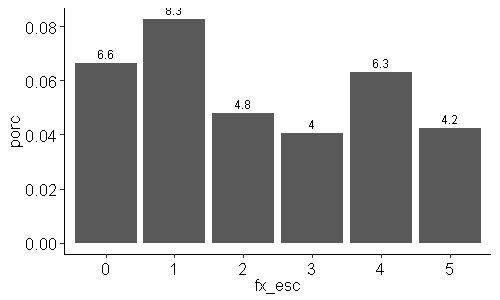

In [26]:

diab_esc <- survey::svytable(~ q030 + fx_esc, pns_design_srvyr)
diab_esc <- as.data.frame(diab_esc)
diab_esc$porc = 0

pop_esc = group_by(diab_esc, fx_esc) %>% summarise(freq = sum(Freq))

diab_esc = diab_esc[diab_esc$q030 == "1", ]

for (i in pop_esc$fx_esc){
   diab_esc[diab_esc$q030 == "1" & diab_esc$fx_esc == i, c("porc")] = diab_esc[diab_esc$q030 == "1" & diab_esc$fx_esc == i, ]$Freq / pop_esc[pop_esc$fx_esc == i,]$freq 
}

options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 100)
p <-ggplot(data=diab_esc, aes(x=fx_esc, y=porc )) +
  geom_bar(stat="identity") +
  geom_text(aes(label=round(porc*100, digits = 1)), vjust=-0.5, color="black", size=3)+ 
  labs_pubr() + theme_pubr()
p


## Data Prep

Limpando pessoas que nunca fizeram exame de pressão alta, colesterol alto e diabetes:

In [9]:
#Separando a base de dados

df = pns_design_srvyr[ ,c("c006", "c009", "fx_esc", "w00103", "w00203", "p009", "p018", "p020", "p025", "p026", "p028", "p035", "p050", "q002", "q029", "q060", "q068", "q124","r039", "freqativ", "fxetaria", "idade", "imc", "q030")]



names(df$variables) = c("sexo_c006","cor_raca_c009", "faixa_escolaridade", "peso_w00103", "altura_w00203", "come_verduras_p009", "come_frutas_p018", "refrigerante_suco_p020", "alimentos_doces_p025", "substitui_refeicoes_p026", "bebida_alcoolica_p028", "dias_semana_ativ_fisica_p035", "fumante_p050", "pressao_alta_q002", "exames_glicemia_q029", "colesterol_alto_q060", "avc_q068", "insuficiencia_renal_q124", "ja_ficou_gravida_r039", "freqativ", "fxetaria", "idade", "imc", "diagnostico_diabetes_q030")

#sexo_c006
#fumante_p050
#pressao_alta_q002
#colesterol_alto_q060
#avc_q068
#insuficiencia_renal_q124

In [10]:

df <- subset(df, diagnostico_diabetes_q030 != " " & diagnostico_diabetes_q030 != 2 & pressao_alta_q002 != " " & colesterol_alto_q060 != " ")


### Preenchendo NAs

* Variáveis d009, p028, p035 e r039 que eram NAs serão preenchidas com 0, já que demonstram uma ausência de seus valores.

In [11]:

# pressao alta = q002

df$variables$faixa_escolaridade = as.numeric(df$variables$faixa_escolaridade)
df$variables[is.na(df$variables$faixa_escolaridade), c("faixa_escolaridade")] = 0
df$variables[is.na(df$variables$bebida_alcoolica_p028), c("bebida_alcoolica_p028")] = 0
df$variables[is.na(df$variables$dias_semana_ativ_fisica_p035), c("dias_semana_ativ_fisica_p035")] = 0
df$variables[df$variables$ja_ficou_gravida_r039 == " ", c("ja_ficou_gravida_r039")] = 0
df$variables[df$variables$pressao_alta_q002 == " ", c("pressao_alta_q002")] = 0
df$variables[df$variables$colesterol_alto_q060 == " ", c("colesterol_alto_q060")] = 0
df$variables[df$variables$diagnostico_diabetes_q030 == " ", c("diagnostico_diabetes_q030")] = 0
df$variables[df$variables$diagnostico_diabetes_q030 == "2", c("diagnostico_diabetes_q030")] = 0
df$variables[df$variables$diagnostico_diabetes_q030 == "3", c("diagnostico_diabetes_q030")] = 0



* Variável c006(peso), será preenchida com a média das pessoas separadas pelo sexo(c006) e pela faixa etária(fxetaria).

In [12]:

df$variables$sexo_c006 <- as.character(df$variables$sexo_c006) 

masc_18 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 18 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_22 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 22 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_32 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 32 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_50 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 50 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_60 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 60 & sexo_c006 == "masculino"), na.rm=TRUE))


femi_18 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 18 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_22 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 22 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_32 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 32 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_50 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 50 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_60 = as.numeric(survey::svymean(~peso_w00103 ,subset(x = df, subset = fxetaria == 60 & sexo_c006 == "feminino"), na.rm=TRUE))


df$variables[df$variables$fxetaria == 18 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(masc_18, digits = 1)
df$variables[df$variables$fxetaria == 22 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(masc_22, digits = 1)
df$variables[df$variables$fxetaria == 32 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(masc_32, digits = 1)
df$variables[df$variables$fxetaria == 50 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(masc_50, digits = 1)
df$variables[df$variables$fxetaria == 60 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(masc_60, digits = 1)


df$variables[df$variables$fxetaria == 18 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(femi_18, digits = 1)
df$variables[df$variables$fxetaria == 22 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(femi_22, digits = 1)
df$variables[df$variables$fxetaria == 32 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(femi_32, digits = 1)
df$variables[df$variables$fxetaria == 50 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(femi_50, digits = 1)
df$variables[df$variables$fxetaria == 60 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$peso_w00103), c("peso_w00103")] = round(femi_60, digits = 1)


* Variável w00203(altura), será preenchida com a média das pessoas separadas pelo sexo(c006) e pela faixa etária(fxetaria).

In [13]:


masc_18 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 18 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_22 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 22 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_32 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 32 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_50 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 50 & sexo_c006 == "masculino"), na.rm=TRUE))
masc_60 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 60 & sexo_c006 == "masculino"), na.rm=TRUE))


femi_18 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 18 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_22 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 22 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_32 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 32 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_50 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 50 & sexo_c006 == "feminino"), na.rm=TRUE))
femi_60 = as.numeric(survey::svymean(~altura_w00203 ,subset(x = df, subset = fxetaria == 60 & sexo_c006 == "feminino"), na.rm=TRUE))


df$variables[df$variables$fxetaria == 18 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$altura_w00203), c("peso_w00103")] = round(masc_18, digits = 1)
df$variables[df$variables$fxetaria == 22 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$altura_w00203), c("peso_w00103")] = round(masc_22, digits = 1)
df$variables[df$variables$fxetaria == 32 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$altura_w00203), c("peso_w00103")] = round(masc_32, digits = 1)
df$variables[df$variables$fxetaria == 50 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$altura_w00203), c("peso_w00103")] = round(masc_50, digits = 1)
df$variables[df$variables$fxetaria == 60 & df$variables$sexo_c006 == "masculino" & is.na(df$variables$altura_w00203), c("peso_w00103")] = round(masc_60, digits = 1)


df$variables[df$variables$fxetaria == 18 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$altura_w00203), c("altura_w00203")] = round(femi_18, digits = 1)
df$variables[df$variables$fxetaria == 22 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$altura_w00203), c("altura_w00203")] = round(femi_22, digits = 1)
df$variables[df$variables$fxetaria == 32 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$altura_w00203), c("altura_w00203")] = round(femi_32, digits = 1)
df$variables[df$variables$fxetaria == 50 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$altura_w00203), c("altura_w00203")] = round(femi_50, digits = 1)
df$variables[df$variables$fxetaria == 60 & df$variables$sexo_c006 == "feminino" & is.na(df$variables$altura_w00203), c("altura_w00203")] = round(femi_60, digits = 1)

df <- df %>% mutate(imc = peso_w00103/(altura_w00203/100* altura_w00203/100)) 
df$variables <- df$variables %>% mutate(imcclass = case_when(imc < 17.0 ~ "1",
                                 imc >= 17.0 & imc < 18.5 ~ "2",
                                 imc >= 18.5 & imc < 25.0 ~ "3",
                                 imc >= 25.0 & imc < 30.0 ~ "4",
                                 imc >= 30.0 & imc < 35.0 ~ "5",
                                 imc >= 35.0 & imc < 40.0 ~ "6",
                                 imc >= 40.0 ~ "7"
                                 ))

df$variables <- df$variables[,c(1:23, 25, 24)]

### Inversão de valores de variáveis

Para permitir e simplificar a análise a partir de um modelo alteraremos os valor de variáveis.

`c006`, sexo:

Valor Original    |      Codificação Original         | Novo Valor    | Codificação Variável `pressao_alta_q002`
------------------|-----------------------------------|---------------|----------------------------------------
 masculino        |  1                                |     0         |  masculino
 femnino          |  2                                |     1         |  feminino
 

In [14]:

df$variables[df$variables$sexo_c006 == "masculino", c("sexo_c006")] = 0
df$variables[df$variables$sexo_c006 == "feminino", c("sexo_c006")] = 1


`q002`, pressão alta:

Valor Original    |      Codificação Original         | Novo Valor    | Codificação Variável `pressao_alta_q002`
------------------|-----------------------------------|---------------|----------------------------------------
 1                |  sim                              |     1         |  sim
 2                |  apenas na gravidez               |     1         |  sim
 3                |  não                              |     0         |  não
 

In [15]:

df$variables[df$variables$pressao_alta_q002 == 2, c("pressao_alta_q002")] = 1
df$variables[df$variables$pressao_alta_q002 == 3, c("pressao_alta_q002")] = 0


`q060`, colesterol alto:

Valor Original    |      Codificação Original         | Novo Valor    | Codificação Variável `colesterol_alto_q060`
------------------|-----------------------------------|---------------|----------------------------------------
 1                |  sim                              |     1         |  sim
 2                |  não                              |     0         |  não
 

In [16]:

df$variables[df$variables$colesterol_alto_q060 == 2, c("colesterol_alto_q060")] = 0


`q124`, insuficiencia renal:

Valor Original    |      Codificação Original    | Novo Valor    | Codificação Variável `insuficiencia_renal_q124`
------------------|-----------------------------------|---------------|----------------------------------------
 1                |  sim                              |     1         |  sim
 2                |  não                              |     0         |  não
 

In [17]:

df$variables[df$variables$insuficiencia_renal_q124 == 2, c("insuficiencia_renal_q124")] = 0


`p050`, fumante:
definição de fumante: http://pepsic.bvsalud.org/scielo.php?script=sci_arttext&pid=S1413-03942014000200015

Valor Original    |      Codificação Original    | Novo Valor    | Codificação Variável `fumante_p050`
------------------|-----------------------------------|---------------|----------------------------------------
 1                |  sim, diariamente                  |     1         |  sim
 2                |  sim, menos que diariamente        |     0         |  não
 3                |  não fumo atualmente               |     0         |  não

In [18]:

df$variables[df$variables$fumante_p050 == 2 | df$variables$fumante_p050 == 3, c("fumante_p050")] = 0


`q068`, avc:

Valor Original    |      Codificação Original    | Novo Valor    | Codificação Variável `ja_ficou_gravida_r039`
------------------|------------------------------|---------------|----------------------------------------
 1                |  sim                         |     1         |  sim
 2                |  não                         |     0         |  não

In [19]:

df$variables[df$variables$avc_q068 == 2, c("avc_q068")] = 0


`q068`, gravidez:

Valor Original    |      Codificação Original    | Novo Valor    | Codificação Variável `ja_ficou_gravida_r039`
------------------|------------------------------|---------------|----------------------------------------
 1                |  sim                         |     1         |  sim
 2                |  não                         |     0         |  não

In [20]:
df$variables[df$variables$ja_ficou_gravida_r039 == 2, c("ja_ficou_gravida_r039")] = 0

# Decisão

Definir remover os registros que tem como NA diagnóstico de colesterol alto q060, pressão alta q002 e diabetes q030.

In [34]:

perda_t <- as.data.frame(survey::svytable(~pressao_alta_q002 + colesterol_alto_q060 + diagnostico_diabetes_q030 , df))

print(paste0("quantidade total de diabéticos: ", sum(perda_t[perda_t$diagnostico_diabetes_q030 == 1, c("Freq")])) )
print(paste0("perda de diabéticos: ", sum(perda_t[perda_t$diagnostico_diabetes_q030 == 1 & (perda_t$pressao_alta_q002 == " " | perda_t$colesterol_alto_q060 == " "), c("Freq")])) )
print(paste0("porcentagem de perda de diabeticos: ", sum(perda_t[perda_t$diagnostico_diabetes_q030 == 1 & (perda_t$pressao_alta_q002 == " " | perda_t$colesterol_alto_q060 == " "), c("Freq")]) / sum(perda_t[perda_t$diagnostico_diabetes_q030 == 1, c("Freq")])  ))

print("")

print(paste0("quantidade total : ", sum(perda_t$Freq)))
print(paste0("perda total: ", sum(perda_t[ (perda_t$pressao_alta_q002 == " " | perda_t$colesterol_alto_q060 == " " | perda_t$diagnostico_diabetes_q030 == " "), c("Freq")])) )
print(paste0("porcentagem de perda total: ", sum(perda_t[(perda_t$pressao_alta_q002 == " " | perda_t$colesterol_alto_q060 == " " | perda_t$diagnostico_diabetes_q030 == " "), c("Freq")]) / sum(perda_t$Freq)))


[1] "quantidade total de diabéticos: 8944235.6255329"
[1] "perda de diabéticos: 0"
[1] "porcentagem de perda de diabeticos: 0"
[1] ""
[1] "quantidade total : 121609040.326191"
[1] "perda total: 0"
[1] "porcentagem de perda total: 0"


# Criando as variáveis dummies

Como todos as features utilizadas são categóricas precisamos transformá-las em dummies para utilização de um modelo de Regressão Logística. utilizaremos a biblioteca `dummies` para essa transormação.

In [21]:
df$variables$exames_glicemia_q029 = NULL

df_dummies = df[ ,c("faixa_escolaridade")]

# esc_dummies <- dummies::dummy(df$variables$escolaridade_d009, sep = "_",)
# df_dummies$variables <- cbind(df_dummies$variables, esc_dummies)
# df_dummies$variables <- df_dummies$variables[, -1]

df_factor = df$variables %>% mutate_if(is.numeric, as.character)

df_factor$sexo_c006 = as.numeric(df_factor$sexo_c006)
df_factor$fumante_p050 = as.numeric(df_factor$fumante_p050)
df_factor$pressao_alta_q002 = as.numeric(df_factor$pressao_alta_q002)
df_factor$colesterol_alto_q060 = as.numeric(df_factor$colesterol_alto_q060)
df_factor$avc_q068 = as.numeric(df_factor$avc_q068)
df_factor$insuficiencia_renal_q124 = as.numeric(df_factor$insuficiencia_renal_q124)
df_factor$ja_ficou_gravida_r039 = as.numeric(df_factor$ja_ficou_gravida_r039)



df_factor$peso_w00103 <- as.numeric(df_factor$peso_w00103)
df_factor$altura_w00203 <- NULL
df_factor$idade <- NULL
df_factor$imc <- NULL
df_factor$peso_w00103 <- NULL

df_factor = df_factor %>% mutate_if(is.character, as.factor)

dummies_df <- mlr::createDummyFeatures(df_factor)

df$variables = dummies_df

# Removendo dummies desnecessários

Para a criação de variáveis dummy, todos os fatores de cada variável foi tranformado em uma variável, assim o último fator criado de cada variável terá uma correlação perfeita com as demais variáveis, tendo um coeficiente indefinido.

In [22]:
df$variables$diagnostico_diabetes_q030.0 = NULL
df$variables$cor_raca_c009.9 = NULL
df$variables$faixa_escolaridade.5 = NULL
df$variables$come_verduras_p009.7 = NULL
df$variables$come_frutas_p018.7 = NULL
df$variables$refrigerante_suco_p020.7 = NULL
df$variables$alimentos_doces_p025.7 = NULL
df$variables$substitui_refeicoes_p026.7 = NULL
df$variables$bebida_alcoolica_p028.7 = NULL
df$variables$dias_semana_ativ_fisica_p035.7 = NULL
df$variables$freqativ.5 = NULL
df$variables$fxetaria.60 = NULL
df$variables$imcclass.7 = NULL

# Modelagem

Como modelo utilizaremos a Regressão Logística para fazer uma análise descritiva do comportamento das variáveis em relação aos diabéticos. O modelo utilizado encontra-se no pacote `survey` com a função `svyglm`, usado para a criação de modelos lineares para dados estratificados.

A família do modelo é a binomial(logit) onde teremos uma saída como uma porcentagem da pessoa pertencerem a classe de Diabéticos.

### Metodologia:

Todas as variáveis dummies serão adicionadas para a criação do modelo e em seguida será feito suas análises. Na análise determinaremos quais variáveis tem relevância estatística para o modelo.

#### Critérios de remoção:

Variáveis com p_value maior que 0.05.

#### Critérios de reagrupamento:

Muitas variáveis dummy representam uma frequência baseada em dias na semana, então Consumo de alimentos doces representam 0, 1, 2, 3 ... dias na semana. Após a remoção veremos quais dessas classes permaneceram no modelo, e caso tenha uma sequência tenha permanecido trataremos da seguinte forma:

* <b>1)</b> Se as classes que ficaram no modelo tenham coeficientes que indicam um aumento probabilistico, elas serão definidas como valor 1, e as que estão fora do modelo terão valor 0.
* <b>2)</b> Se as classes que ficaram no modelo tenham coeficientes que indicam uma diminuição probabilística, elas serão definidas como valor 0, e as demais e as que estão fora do modelo terão valor 1.
* <b>3)</b> Se somente uma classe ficou no modelo: 
    * se suas classes pares foram removidas no mesmo modelo: não será reorganizada.
    * se suas classes pares foram removidas no modelo anterior: ela será utilizada como um threshold, e a nova classificação seguirá as regras 1 e 2.
* <b>4)</b> Se as classes que ficaram no modelo forem intermediárias(ex.: 4 e 5), ou todas as classes permaneceram, a partir das tabulações e estudos anteriores, determinaremos qual será o threshold e aplicaremos as regras 1 e 2.

** Obs: mesmo que os coeficientes das classes que ficaram no modelo sejam negativos, o impacto probabilistico será definido pela diminuição (chegando mais perto de 0) ou aumento (se afastando de 0) do valor de seus coeficientes. 

    

In [24]:
construir_modelo <- function(df){

   nomes = names(df$variables[1:(length(df$variables) - 1)])
   #fla <- paste("diagnostico_diabetes_q030.1 ~", paste(nomes, collapse="+"), " -1")
   fla <- paste("diagnostico_diabetes_q030.1 ~", paste(nomes, collapse="+"))
   
   #gl <- survey::svyglm(as.formula(fla) , family = "quasibinomial", design=df)
   gl <- survey::svyglm(as.formula(fla) , family = "binomial", design=df)
   
   return(gl)
}
   
ordenar_pvalue <- function(model){
   
   df_model = data.frame(keyName=names(model$coefficients), value=model$coefficients, row.names=NULL)
   df_model$COEFF_ABS = abs(df_model$value)
   
   p <- coef(summary(model))[,4]
   df_p = data.frame(keyName=names(p), value=p, row.names=NULL)
   
   df_model$p_value <- p
   
   df_model <- df_model[order(df_model$COEFF_ABS),]
   
   return(df_model)
   
}


### Primeiro modelo:

In [25]:
modelb <- construir_modelo(df)

print(summary(modelb))

df_modelb = ordenar_pvalue(modelb)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


Call:
svyglm(formula = as.formula(fla), design = df, family = "binomial")

Survey design:
subset(df, diagnostico_diabetes_q030 != " " & diagnostico_diabetes_q030 != 
    2 & pressao_alta_q002 != " " & colesterol_alto_q060 != " ")

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.646408   1.159312  -0.558 0.577155    
sexo_c006                      -0.171293   0.082744  -2.070 0.038486 *  
fumante_p050                   -0.196768   0.117247  -1.678 0.093360 .  
pressao_alta_q002               0.924637   0.074288  12.447  < 2e-16 ***
colesterol_alto_q060            0.739389   0.074128   9.975  < 2e-16 ***
avc_q068                        0.370584   0.144264   2.569 0.010232 *  
insuficiencia_renal_q124        0.252671   0.177022   1.427 0.153538    
ja_ficou_gravida_r039          -0.231973   0.109705  -2.115 0.034517 *  
cor_raca_c009.1                -2.426599   1.002573  -2.420 0.015538 *  
cor_raca_c009.2         

In [52]:
modelqb <- construir_modelo(df)

print(summary(modelqb))

df_modelqb = ordenar_pvalue(modelqb)

Warning message in summary.glm(g):
"observations with zero weight not used for calculating dispersion"Warning message in summary.glm(glm.object):
"observations with zero weight not used for calculating dispersion"


Call:
svyglm(formula = as.formula(fla), design = df, family = "quasibinomial")

Survey design:
subset(df, diagnostico_diabetes_q030 != " " & diagnostico_diabetes_q030 != 
    2 & pressao_alta_q002 != " " & colesterol_alto_q060 != " ")

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    -0.646408   1.159312  -0.558 0.577155    
sexo_c006                      -0.171293   0.082744  -2.070 0.038486 *  
fumante_p050                   -0.196768   0.117247  -1.678 0.093360 .  
pressao_alta_q002               0.924637   0.074288  12.447  < 2e-16 ***
colesterol_alto_q060            0.739389   0.074128   9.975  < 2e-16 ***
avc_q068                        0.370584   0.144264   2.569 0.010232 *  
insuficiencia_renal_q124        0.252671   0.177022   1.427 0.153538    
ja_ficou_gravida_r039          -0.231973   0.109705  -2.115 0.034517 *  
cor_raca_c009.1                -2.426599   1.002573  -2.420 0.015538 *  
cor_raca_c009.2    

Com esses dados criamos 2 modelos, um com a família binomial e outra com a família quasibinomial, e calculamos o teste do qui-quadrado para observar se nosso modelo está com superdispersão, indicando um viés sobre os dados.

hipotese nula $\phi=1$ 

hipotese alternativa $\phi \neq 1$

In [54]:
pchisq(summary(modelqb)$dispersion[1] * modelb$df.residual, modelb$df.residual, lower.tail = F)

[1] 0.8115516

#### Variáveis com p_value maior que 0.05

In [26]:
df_modelb_r = df_modelb[df_modelb$p_value >= 0.06, ]
df_modelb_r[order(df_modelb_r$keyName),]

,keyName,value,COEFF_ABS,p_value
1,(Intercept),-0.646408421,0.646408421,0.57715474
43,alimentos_doces_p025.3,0.009676616,0.009676616,0.95983622
44,alimentos_doces_p025.4,0.313013307,0.313013307,0.16150626
45,alimentos_doces_p025.5,-0.124135047,0.124135047,0.58313819
46,alimentos_doces_p025.6,-0.027345357,0.027345357,0.92030946
54,bebida_alcoolica_p028.0,0.344175699,0.344175699,0.18926005
55,bebida_alcoolica_p028.1,0.038255459,0.038255459,0.89476968
56,bebida_alcoolica_p028.2,-0.169676906,0.169676906,0.56367787
58,bebida_alcoolica_p028.4,-0.391613460,0.391613460,0.44860059
59,bebida_alcoolica_p028.5,-0.033027753,0.033027753,0.94598335


#### Variáveis que serão removidas

* <b>Consumo de verduras(p009):</b> variável que será removida do modelo pela regra de remoção.

* <b>Dias da semana de atividade física(p035):</b> variável que será removida do modelo por ter todas suas classes passando pela regra de remoção.

* <b>Faixa de escolaridade(p035):</b> variável que será removida do modelo por ter todas suas classes passando pela regra de remoção.

* <b>Frequência de atividade física:</b> variável que será removida do modelo por ter todas suas classes passando pela regra de remoção.

* <b>Fumante(p050):</b> variável que será removida do modelo pela regra de remoção.

* <b>Insuficiência Renal(q124):</b> variável que será removida do modelo pela regra de remoção.

* <b>Consumo de Refrigerante e Suco industrializado(p020):</b> variável que será removida do modelo por ter todas suas classes passando pela regra de remoção.

Outras variáveis terão somente algumas de suas classes removidas.

In [27]:
droplist1 <- df_modelb[df_modelb$p_value >= 0.06, 1] 

df2 = df
df2$variables <- df2$variables[, !colnames(df2$variables) %in% droplist1]

#### Variáveis reorganizadas

Como o comportamento de algumas variáveis mostrou que algumas de suas classes em sequência teve importância para o modelo, elas serão reorganizadas para identificar essa diferenciação:

* <b>Consumo de alimentos doces(p025):</b> dessa variável, apenas os consumos menores que 3 vezes por semanas estão contribuindo para o modelo, e por se adequar na primeira regra de reorganização, iremos alterar para a seguinte classificação:

Variável    |      Classes anteriores    | Novas Classes    | 
------------------|-----------------------------------|---------------
Consumo de alimentos doces(p025)| 0, 1, 2, 3, 4, 5, 6 e 7 vezes por semana | 1: <= 2 vezes por semana <br> 0: > 2 vezes por semana   


In [28]:
drop_new = c('alimentos_doces_p025.0', 'alimentos_doces_p025.1', 'alimentos_doces_p025.2')
df2$variables <- df2$variables[, !colnames(df2$variables) %in% drop_new]

In [29]:
df2$variables$alimentos_doces_p025 = pns_design_srvyr$variables$p025
df2 <- df2 %>% 
     mutate(alimentos_doces_p025 = case_when(alimentos_doces_p025 <= 2 ~ 1,
                                             alimentos_doces_p025 > 2 ~ 0))

* <b>Consumo de frutas(p009):</b> dessa variável, apenas o consumo menor que 4 vezes por semana contribui para o modelo, e por se adequar a regra de reorganização 2, terá a seguinte classificação>

Variável    |      Classes anteriores    | Novas Classes    | 
------------------|-----------------------------------|---------------
Consumo de Frutas(p009)| 0, 1, 2, 3, 4, 5, 6 e 7 vezes por semana | 1: >= 4 vezes por semana <br> 0: < 4 vezes por semana 

In [30]:
drop_new = c('come_frutas_p018.0', 'come_frutas_p018.1', 'come_frutas_p018.2', 'come_frutas_p018.3')
df2$variables <- df2$variables[, !colnames(df2$variables) %in% drop_new]

In [31]:
df2$variables$come_frutas_p018 = pns_design_srvyr$variables$p018
df2 <- df2 %>% 
     mutate(come_frutas_p018 = case_when(come_frutas_p018 >= 4 ~ 1,
                                             come_frutas_p018 < 4 ~ 0))

* <b>Faixa Etária:</b> dessa variável, todas elas tiveram um resultado negativo. Com o uso da regra 4 de reorganização, e como mostrado nas tabulações a faixa etaria > 50 tem mais chance de ser diabético, então faremos a segunte transformação:

Variável    |      Classes anteriores    | Novas Classes    | 
------------------|-----------------------------------|---------------
Faixa Etária | 18, 22, 32, 50 e 60 | 1: > faixa etária de 50 <br> 0: <= faixa etária de 50

In [32]:
drop_new = c("fxetaria.18", "fxetaria.22", "fxetaria.32", "fxetaria.50")
df2$variables <- df2$variables[, !colnames(df2$variables) %in% drop_new]

In [33]:
df2$variables$fxetaria = pns_design_srvyr$variables$fxetaria
df2 <- df2 %>% 
     mutate(fxetaria = case_when(fxetaria == "60" ~ 1,
                                 fxetaria == "50" | fxetaria == "32" | fxetaria == "28" | fxetaria == "12" | fxetaria == "7" ~ 0))

In [34]:
df2$variables = df2$variables[,c(c(1:18), c(20, 21, 22, 19))]

### Segundo modelo:

Sem as variáveis com p_value maior que 0.05 e outras reorganizadas criamos mais um modelo.

In [69]:
model2 <- construir_modelo(df2)

print(summary(model2))

df_model2 = ordenar_pvalue(model2)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


Call:
svyglm(formula = as.formula(fla), design = df, family = "binomial")

Survey design:
subset(df, diagnostico_diabetes_q030 != " " & diagnostico_diabetes_q030 != 
    2 & pressao_alta_q002 != " " & colesterol_alto_q060 != " ")

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -1.11980    0.96789  -1.157 0.247347    
sexo_c006                   0.03102    0.08169   0.380 0.704141    
pressao_alta_q002           1.08735    0.07462  14.571  < 2e-16 ***
colesterol_alto_q060        0.75320    0.07425  10.145  < 2e-16 ***
avc_q068                    0.44383    0.14599   3.040 0.002376 ** 
ja_ficou_gravida_r039      -0.46644    0.10908  -4.276 1.94e-05 ***
cor_raca_c009.1            -2.67984    0.95484  -2.807 0.005025 ** 
cor_raca_c009.2            -2.55789    0.96291  -2.656 0.007920 ** 
cor_raca_c009.3            -2.75431    1.01941  -2.702 0.006917 ** 
cor_raca_c009.4            -2.74934    0.95570  -2.877 0.004033 ** 
cor_ra

### Variáveis com p_value maior que 0.05:

In [70]:
df_model2[df_model2$p_value >= 0.06, ]

,keyName,value,COEFF_ABS,p_value
2,sexo_c006,0.03102081,0.03102081,0.70414052
13,substitui_refeicoes_p026.0,0.07000150,0.07000150,0.30937666
12,refrigerante_suco_p020.3,0.13101075,0.13101075,0.41373661
19,imcclass.5,-0.19844351,0.19844351,0.08510337
16,imcclass.1,-0.81470061,0.81470061,0.09563261
1,(Intercept),-1.11979608,1.11979608,0.24734665


#### Variáveis que serão removidas

* <b>Sexo(p006):</b> variável que será removida do modelo por ter todas suas classes com p_value > 0,05.

Outras variáveis terão somente algums de suas classes removidas.

In [171]:
droplist2 <- df_model2[df_model2$p_value >= 0.06, 1] 

df3 = df2
df3$variables <- df3$variables[, !colnames(df3$variables) %in% droplist2]

#### Variáveis reorganizadas

Como o comportamento de algumas variáveis mostrou que algumas de suas classes em sequência teve importância para o modelo, elas serão reorganizadas para identificar essa diferenciação:

* <b>Consumo de bebidas alcoolicas(p028):</b> dessa variável, apenas os consumos de 3 vezes por semanas está contribuindo para o modelo e com a regra de reorganização 2 iremos alterar para a seguinte classificação:

Variável    |      Classes anteriores    | Novas Classes    | 
------------------|-----------------------------------|---------------
  bebida_alcoolica(p028) | 0, 1, 2, 3, 4, 5, 6 e 7 vezes por semana | 1: < 3 vezes por semana <br> 0: >= 3 vezes por semana  


In [172]:
drop_new = c('bebida_alcoolica_p028.3')
df3$variables <- df3$variables[, !colnames(df3$variables) %in% drop_new]

In [173]:
df3$variables$bebida_alcoolica_p028 = pns_design_srvyr$variables$p028
df3 <- df3 %>% 
     mutate(bebida_alcoolica_p028 = case_when(bebida_alcoolica_p028 < 3 ~ 1,
                                             bebida_alcoolica_p028 >= 3 ~ 0,
                                             is.na(bebida_alcoolica_p028) ~ 1 ))

* <b>IMC</b> dessa variável, duas classes estão contribuindo para o modelo, pela regra número 4 de reorganização e pelos estudos médicos indicarem que a partir do IMC 4 as pessoas estão em um grupo de risco, iremos alterar para a seguinte classificação:

Variável    |      Classes anteriores    | Novas Classes    | 
------------------|-----------------------------------|---------------
  IMC | 1, 2, 3, 4, 5, 6 e 7 | 1 >= 4 <br> 0 < 4

In [174]:
drop_new = c('imcclass.4', "imcclass.3")
df3$variables <- df3$variables[, !colnames(df3$variables) %in% drop_new]

In [175]:
df3$variables$imcclass = pns_design_srvyr$variables$imcclass
df3 <- df3 %>% 
     mutate(imcclass = case_when(imcclass == "4" | imcclass == "5" | imcclass == "6" | imcclass == "7" ~ 1,
                                 imcclass == "1" | imcclass == "2" | imcclass == "3" ~ 0,
                                 is.na(imcclass) ~ 0))

In [176]:
df3$variables = df3$variables[,c(c(1:13), c(15, 16, 14))]

### Terceiro Modelo

Sem as variáveis com p_value maior que 0.05 do segundo modelo criamos mais um modelo.

In [177]:
model3 <- construir_modelo(df3)

print(summary(model3))

df_model3 = ordenar_pvalue(model3)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


Call:
svyglm(formula = as.formula(fla), design = df, family = "binomial")

Survey design:
subset(df, diagnostico_diabetes_q030 != " " & diagnostico_diabetes_q030 != 
    2 & pressao_alta_q002 != " " & colesterol_alto_q060 != " ")

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -2.14273    0.96751  -2.215 0.026823 *  
pressao_alta_q002           1.13080    0.07407  15.267  < 2e-16 ***
colesterol_alto_q060        0.75129    0.07376  10.185  < 2e-16 ***
avc_q068                    0.44849    0.14589   3.074 0.002121 ** 
ja_ficou_gravida_r039      -0.44231    0.10095  -4.382 1.20e-05 ***
cor_raca_c009.1            -2.78670    0.94993  -2.934 0.003365 ** 
cor_raca_c009.2            -2.64105    0.95655  -2.761 0.005781 ** 
cor_raca_c009.3            -2.91332    1.01338  -2.875 0.004058 ** 
cor_raca_c009.4            -2.86171    0.95071  -3.010 0.002624 ** 
cor_raca_c009.5            -2.53570    1.02152  -2.482 0.013085 *  
substi

### Variáveis com p_value maior que 0.05:

Nenhuma variável será removida.

In [178]:
df_model3[df_model3$p_value >= 0.06, ]

keyName,value,COEFF_ABS,p_value


In [184]:
droplist3 <- df_model3[df_model3$p_value >= 0.06, 1] 

df4 = df3
df4$variables <- df4$variables[, !colnames(df4$variables) %in% droplist3]

#### Variáveis reorganizadas

* <b>Substitui refeições por lanche(p026):</b> dessa variável, apenas os consumos de 6 vezes por semanas está contribuindo para o modelo, e com a regra de reorganização 3, iremos alterar para a seguinte classificação:

Variável    |      Classes anteriores    | Novas Classes    | 
------------------|-----------------------------------|---------------
  substitui_refeicoes_p026(p026) | 0, 1, 2, 3, 4, 5, 6 e 7 vezes por semana | 1: < 6 vezes por semana <br> 0: > 6 vezes por semana  

In [185]:
drop_new = c('substitui_refeicoes_p026.6')
df3$variables <- df3$variables[, !colnames(df3$variables) %in% drop_new]

In [186]:
df4$variables$substitui_refeicoes_p026 = pns_design_srvyr$variables$p026
df4 <- df4 %>% 
     mutate(substitui_refeicoes_p026 = case_when(substitui_refeicoes_p026 < 6 ~ 1,
                                 substitui_refeicoes_p026 >= 6 ~ 0))

In [189]:
df4$variables = df4$variables[,c(c(1:14), c(16, 15))]

### Quarto Modelo

Ultimo modelo criado com todas as variáveis com um p_value menor que 0.05.

In [191]:
model4 <- construir_modelo(df4)

print(summary(model4))

df_model4 = ordenar_pvalue(model4)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


Call:
svyglm(formula = as.formula(fla), design = df, family = "binomial")

Survey design:
subset(df, diagnostico_diabetes_q030 != " " & diagnostico_diabetes_q030 != 
    2 & pressao_alta_q002 != " " & colesterol_alto_q060 != " ")

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.04979    0.98135  -2.089 0.036776 *  
pressao_alta_q002         1.12734    0.07402  15.231  < 2e-16 ***
colesterol_alto_q060      0.74925    0.07408  10.114  < 2e-16 ***
avc_q068                  0.44717    0.14612   3.060 0.002221 ** 
ja_ficou_gravida_r039    -0.44546    0.10075  -4.421 9.99e-06 ***
cor_raca_c009.1          -2.79949    0.95015  -2.946 0.003229 ** 
cor_raca_c009.2          -2.65014    0.95675  -2.770 0.005626 ** 
cor_raca_c009.3          -2.91757    1.01325  -2.879 0.004000 ** 
cor_raca_c009.4          -2.87095    0.95092  -3.019 0.002547 ** 
cor_raca_c009.5          -2.53896    1.02178  -2.485 0.012991 *  
alimentos_doces_p025      1.

### Variáveis com p_value maior que 0.05:

In [192]:
df_model4[df_model4$p_value >= 0.06, ]

,keyName,value,COEFF_ABS,p_value
16,substitui_refeicoes_p026,-0.08892467,0.08892467,0.6032853


#### Variáveis que serão removidas

* <b>substitui_refeicoes_p026:</b> variável reorganizada anteriormente, será removida do modelo por ter todas suas classes com p_value > 0,05.


In [193]:
droplist4 <- df_model4[df_model4$p_value >= 0.06, 1] 

df5 = df4
df5$variables <- df5$variables[, !colnames(df5$variables) %in% droplist4]

### Quinto Modelo

Quinto modelo criado com todas as variáveis com um p_value menor que 0.05.

In [194]:
model5 <- construir_modelo(df5)

print(summary(model5))

df_model5 = ordenar_pvalue(model5)

Warning message in eval(family$initialize):
"non-integer #successes in a binomial glm!"


Call:
svyglm(formula = as.formula(fla), design = df, family = "binomial")

Survey design:
subset(df, diagnostico_diabetes_q030 != " " & diagnostico_diabetes_q030 != 
    2 & pressao_alta_q002 != " " & colesterol_alto_q060 != " ")

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.13715    0.96764  -2.209 0.027243 *  
pressao_alta_q002      1.12798    0.07393  15.258  < 2e-16 ***
colesterol_alto_q060   0.74969    0.07411  10.116  < 2e-16 ***
avc_q068               0.44613    0.14596   3.057 0.002249 ** 
ja_ficou_gravida_r039 -0.44474    0.10093  -4.407 1.07e-05 ***
cor_raca_c009.1       -2.79422    0.95010  -2.941 0.003286 ** 
cor_raca_c009.2       -2.64746    0.95672  -2.767 0.005673 ** 
cor_raca_c009.3       -2.91398    1.01340  -2.875 0.004050 ** 
cor_raca_c009.4       -2.86769    0.95088  -3.016 0.002575 ** 
cor_raca_c009.5       -2.53673    1.02164  -2.483 0.013058 *  
alimentos_doces_p025   0.99700    0.08717  11.437  < 2e-16 **

#### Variáveis que ficaram no modelo:

In [196]:
df_model5

,keyName,value,COEFF_ABS,p_value
12,come_frutas_p018,0.2750179,0.2750179,1.884837e-04
15,imcclass,0.4038257,0.4038257,8.829543e-09
5,ja_ficou_gravida_r039,-0.4447364,0.4447364,1.070649e-05
4,avc_q068,0.4461331,0.4461331,2.249447e-03
14,bebida_alcoolica_p028,0.4686398,0.4686398,4.076943e-03
3,colesterol_alto_q060,0.7496875,0.7496875,7.593754e-24
13,fxetaria,0.8531130,0.8531130,3.708668e-26
11,alimentos_doces_p025,0.9969975,0.9969975,5.993187e-30
2,pressao_alta_q002,1.1279780,1.1279780,1.660102e-51
1,(Intercept),-2.1371472,2.1371472,2.724251e-02


## Conclusão do modelo:

Com os dados da PNS, feito em âmbito nacional, não é possível a criação de um modelo preditivo já que não temos os dados históricos das pessoas. 

Das variáveis utilizadas temos um modelo que demonstra o comportamento dos diabéticos no Brasil, observando como as pessoas estão se abstendo de hábitos considerados prejudiciais:

* <b>Consumo de Frutas(p018):</b>  variável que indica o consumo de frutas por semana, ela foi reoganizada anteriormente para que o consumo maior ou igual a quatro vezes por semana ficasse com valor 1, e menor que 4 igual a 0. Seu coeficiente indica que os diabéticos tendem a consomir mais frutas, um sinal de um estilo de vida mais regrado.
* <b>IMC:</b> variável que indica  índice de massa corporal para determinar se uma pessoa está com seu peso ideal. No modelo os valores 3(normal) e 4(sobrepeso) foram os únicos que ficaram dessa variável, então ela foi reorganizada para que valores acima ou igual a 4 seja 1 e abaixo seja 0. Com essa configuração o coeficiente ficou positivo, mostrando a tendência de pessoas diabéticas terem maior sobrepeso. 
* <b>Já ficou grávida(r039):</b> essa variável indica se uma mulher já ficou grávida, pela proporção de pessoas que ficaram grávidas e são diabéticas e não são diabéticas seu coeficiente mostrou essa tendência. ***** refazer análise
* <b>Diagnóstico de AVC(q068):</b> variável que indica se uma pessoa já teve um AVC, tendo seu coeficiente positivo é um sinal de que os diabéticos também pode ter sofrido com esse problema.
* <b>Consumo de Bebidas Alcoólicas(p028):</b> variável que indica o consumo de bebidas alcoólicas por semana. Ela foi reorganizada para que valores menores que 3 vezes por semana seja 1 e maiores ou iguais a 3 seja 0. Com o coeficiente positivo, as pessoas com diagnóstico de diabetes tendem a consumir menos bebidas alcoólicas, uma tendência junto a outros hábitos considerados prejudiciais.
* <b>Colesterol Alto(q060):</b> variável que indica o diagnóstico de colesterol alto, sendo um problema decorrente da alimentação e o estilo de vida, e tendo um coeficiente positivo, é mais um ponto que pode ser indicador de diabéticos.
* <b>Faixa Etária:</b> variável que indica a divisão da população pela idade, e foi reoganizada pela análise da proporção de diabéticos por esse valor e pelo aumento da probabilidade de ser diabético com o aumento da idade. Na nova classificação o valor 1 indica pessoas na faixa de 60+, e com o coeficiente positivo essa população mostrou estar em uma faixa de risco.
* <b>Consumo de alimentos doces(p025):</b> variável de comportamento alimentar das pessoas, ela foi reorganizada para que valores menor ou igual a 2 vezes por semana fosse 1. Por ser um fator de constante atenção de suas vidas, os diabéticos tendem a consumir menos alimentos doces após seu diagnóstico. Pelo comportento da variável, o coeficiente ficou positivo e mostrou que os diabéticos tendem a comer menos doces.
* <b>Pressão Alta(q002):</b> diagnóstico de hipertensão, uma doença que pode ser adquirida a partir de hábitos de vida do indivíduo e contém um coeficiente positivo, indicando uma maior probabilidade da pessoa ser diabética.
* <b>Cor/Raça(c009):</b> variável indicando a cor das pessoas, com os coeficientes negativos elas não têm diferenças significantes entre elas. 

Com esse modelo conseguimos entender um padrão de vida das pessoas com diagnóstico de diabetes. Elas tentem a ter um comportamentos mais saudáveis em relação ao consumo de alimentos, principalmente os doces. Por essa doença estar ligada a comportamentos históricos não muito saudáveis, ver que indicadores de um estilo de vida menos prejudicial mostra que a população sabe do seu risco e as recomendações médicas estão sendo seguidas. 

### TODO

* Plot de pessoas que já ficou grávida, dividido em diabeticos e nao diabeticos.
* Definir o que fazer com a variável de cor/raça
* Análise das pessoas que nunca fizeram exame de sangue e gerar uma estimativa das pessoas em risco de ter a doença. Fazer com base no algoritmo de conduta terapêutica no diabetes tipo 2: https://www.diabetes.org.br/publico/images/pdf/sbd_dm2_2019_2.pdf

## Análise do grupo de risco

In [59]:
df_analise = pns_design_srvyr[ ,c("w00203", "w00103", "idade", "c006", "q030", "q002", "p035", "q029")]
names(df_analise$variables) = c("altura_w00203", "peso_w00103", "idade_c008", "sexo_c006", "diag_diabetes_q030", "pressao_alta_q002", "ativ_fisica_p035", "exame_diab_q029")
df_analise = subset(df_analise, (!is.na(altura_w00203)))

In [60]:
df_risco = read.csv("risco_diabetes.csv")

In [61]:
df_risco_show = df_risco
df_risco_show = within(df_risco_show,  V1 <- paste(X1_maior.igual, X1_menor.igual, sep="-"))
df_risco_show = within(df_risco_show,  V2 <- paste(X2_maior.igual, X2_menor.igual, sep="-"))
df_risco_show = within(df_risco_show,  V3 <- paste(X3_maior.igual, "+",sep=""))
df_risco_show = df_risco_show[c("altura", "V1", "V2", "V3")]

In [62]:
df_risco_show

altura,V1,V2,V3
1.47,54-64,65-86,87+
1.50,56-67,67-89,90+
1.52,58-69,69-92,93+
1.55,60-71,72-95,96+
1.57,62-74,74-98,99+
1.60,64-76,77-102,102+
1.63,66-78,79-105,105+
1.65,68-81,82-108,109+
1.68,70-84,84-112,112+
1.70,72-86,87-115,116+


In [63]:
# W00203 altura
# W00103 peso
# 1 c008 idade
# 2 c006 sexo
# 3 q030 diagnostico diabetes - 2
# 4 mãe ou pai com diabetes
# 5 q002 pressão alta
# 6 fisicamente ativos
# 7 tabela

* Q04601 Em algum dos atendimentos para diabetes, algum médico ou outro profissional de saúde lhe recomendou manter uma alimentação saudável (com frutas  vegetais)?
* Q04603 Em algum dos atendimentos para diabetes, algum médico ou outro profissional de saúde lhe recomendou praticar atividade física regular?
* Q04604 Em algum dos atendimentos para diabetes, algum médico ou outro profissional de saúde lhe recomendou não fumar?
* Q04605 Em algum dos atendimentos para diabetes, algum médico ou outro profissional de saúde lhe recomendou não beber em excesso?

In [64]:
diab_tot <- as.data.frame(survey::svytable(~ diag_diabetes_q030, df_analise))
diab_tot

diag_diabetes_q030,Freq
,16752433
1,9107957
2,332557
3,118652344


In [65]:
#porcent
diab_tot[diab_tot$diag_diabetes_q030 == " ","Freq"] / sum(diab_tot$Freq)

[1] 0.1156574

In [66]:
df_risco$altura = df_risco$altura * 100

In [67]:
df_risco

altura,X1_maior.igual,X1_menor.igual,X2_maior.igual,X2_menor.igual,X3_maior.igual
147,54,64,65,86,87
150,56,67,67,89,90
152,58,69,69,92,93
155,60,71,72,95,96
157,62,74,74,98,99
160,64,76,77,102,102
163,66,78,79,105,105
165,68,81,82,108,109
168,70,84,84,112,112
170,72,86,87,115,116


In [68]:
pegar_altura_tab <- function(df){
    
    alt = as.numeric(df["altura_w00203"])
    
    if (is.na(alt)){
        return(0)
    }
    
    n_alt = 0   
    for (alt_tab in df_risco$altura){
        if (alt <= alt_tab){
            n_alt = alt_tab
            break
        }
    }
    if (n_alt == 0){
        n_alt = 193
    }
   
   return(n_alt)
}

In [69]:
df_analise$variables$altura_tab <- apply(df_analise$variables, 1, pegar_altura_tab)

In [70]:
head(df_analise$variables)

altura_w00203,peso_w00103,idade_c008,sexo_c006,diag_diabetes_q030,pressao_alta_q002,ativ_fisica_p035,exame_diab_q029,altura_tab
162.0,59.5,35,masculino,3,3,NA,5,163
169.0,81.2,42,masculino,,,1,6,170
170.0,55.0,32,feminino,3,3,NA,3,170
NA,NA,27,feminino,2,2,NA,1,0
169.4,78.0,53,masculino,3,3,NA,5,170
161.5,66.8,28,feminino,3,3,NA,3,163


In [71]:
pegar_pontos_peso <- function(df){
    
    alt = as.numeric(df["altura_tab"])
    peso = as.numeric(df["peso_w00103"])
    
    if (length(df_risco[df_risco$altura == alt, "altura"]) > 0){
    
        tab_risco = df_risco[df_risco$altura == alt, ]
        
        if((peso >= tab_risco["X1_maior.igual"]) & (peso <= tab_risco["X1_menor.igual"])){
            return(1)
        } else if((peso >= tab_risco["X2_maior.igual"]) & (peso <= tab_risco["X2_menor.igual"])){
            return(2)
        } else if((peso >= tab_risco["X3_maior.igual"])){
            return(3)
        } else{
            return(0)
        }

    } else{
        return (0)
    }

}

In [72]:
head(df_analise$variables, 1)

altura_w00203,peso_w00103,idade_c008,sexo_c006,diag_diabetes_q030,pressao_alta_q002,ativ_fisica_p035,exame_diab_q029,altura_tab
162,59.5,35,masculino,3,3,NA,5,163


In [73]:
apply(head(df_analise$variables, 1),1, pegar_pontos_peso)

[1] 0

In [74]:
df_analise$variables$pontos_alt_peso <- apply(df_analise$variables, 1, pegar_pontos_peso)

In [75]:
df_analise <- df_analise %>% 
     mutate(pontos_idade = case_when(idade_c008 < 40 ~ 0,
                                     idade_c008 <= 49 ~ 1,
                                     idade_c008 <= 59 ~ 2,
                                     idade_c008 >= 60 ~ 3,
                                     TRUE ~ 0))

In [76]:
head(df_analise$variables)

altura_w00203,peso_w00103,idade_c008,sexo_c006,diag_diabetes_q030,pressao_alta_q002,ativ_fisica_p035,exame_diab_q029,altura_tab,pontos_alt_peso,pontos_idade
162.0,59.5,35,masculino,3,3,NA,5,163,0,0
169.0,81.2,42,masculino,,,1,6,170,1,1
170.0,55.0,32,feminino,3,3,NA,3,170,0,0
NA,NA,27,feminino,2,2,NA,1,0,0,0
169.4,78.0,53,masculino,3,3,NA,5,170,1,2
161.5,66.8,28,feminino,3,3,NA,3,163,1,0


In [77]:
df_analise <- df_analise %>% 
     mutate(pontos_sexo = case_when(sexo_c006 == "masculino" ~ 1,
                                    TRUE ~ 0))

In [78]:
head(df_analise$variables)

altura_w00203,peso_w00103,idade_c008,sexo_c006,diag_diabetes_q030,pressao_alta_q002,ativ_fisica_p035,exame_diab_q029,altura_tab,pontos_alt_peso,pontos_idade,pontos_sexo
162.0,59.5,35,masculino,3,3,NA,5,163,0,0,1
169.0,81.2,42,masculino,,,1,6,170,1,1,1
170.0,55.0,32,feminino,3,3,NA,3,170,0,0,0
NA,NA,27,feminino,2,2,NA,1,0,0,0,0
169.4,78.0,53,masculino,3,3,NA,5,170,1,2,1
161.5,66.8,28,feminino,3,3,NA,3,163,1,0,0


In [79]:
df_analise <- df_analise %>% 
     mutate(pontos_sgrav = case_when(diag_diabetes_q030 == "2" ~ 1,
                                    TRUE ~ 0))

In [80]:
head(df_analise$variables)

altura_w00203,peso_w00103,idade_c008,sexo_c006,diag_diabetes_q030,pressao_alta_q002,ativ_fisica_p035,exame_diab_q029,altura_tab,pontos_alt_peso,pontos_idade,pontos_sexo,pontos_sgrav
162.0,59.5,35,masculino,3,3,NA,5,163,0,0,1,0
169.0,81.2,42,masculino,,,1,6,170,1,1,1,0
170.0,55.0,32,feminino,3,3,NA,3,170,0,0,0,0
NA,NA,27,feminino,2,2,NA,1,0,0,0,0,1
169.4,78.0,53,masculino,3,3,NA,5,170,1,2,1,0
161.5,66.8,28,feminino,3,3,NA,3,163,1,0,0,0


In [81]:
df_analise <- df_analise %>% 
     mutate(pontos_hipertensao = case_when(pressao_alta_q002 == "1" ~ 1,
                               TRUE ~ 0))

In [82]:
head(df_analise$variables)

altura_w00203,peso_w00103,idade_c008,sexo_c006,diag_diabetes_q030,pressao_alta_q002,ativ_fisica_p035,exame_diab_q029,altura_tab,pontos_alt_peso,pontos_idade,pontos_sexo,pontos_sgrav,pontos_hipertensao
162.0,59.5,35,masculino,3,3,NA,5,163,0,0,1,0,0
169.0,81.2,42,masculino,,,1,6,170,1,1,1,0,0
170.0,55.0,32,feminino,3,3,NA,3,170,0,0,0,0,0
NA,NA,27,feminino,2,2,NA,1,0,0,0,0,1,0
169.4,78.0,53,masculino,3,3,NA,5,170,1,2,1,0,0
161.5,66.8,28,feminino,3,3,NA,3,163,1,0,0,0,0


In [83]:
df_analise <- df_analise %>% 
     mutate(pontos_atv_fisica = case_when(ativ_fisica_p035 >= 2 ~ 0,
                               TRUE ~ 1))

In [84]:
head(df_analise$variables)

altura_w00203,peso_w00103,idade_c008,sexo_c006,diag_diabetes_q030,pressao_alta_q002,ativ_fisica_p035,exame_diab_q029,altura_tab,pontos_alt_peso,pontos_idade,pontos_sexo,pontos_sgrav,pontos_hipertensao,pontos_atv_fisica
162.0,59.5,35,masculino,3,3,NA,5,163,0,0,1,0,0,1
169.0,81.2,42,masculino,,,1,6,170,1,1,1,0,0,1
170.0,55.0,32,feminino,3,3,NA,3,170,0,0,0,0,0,1
NA,NA,27,feminino,2,2,NA,1,0,0,0,0,1,0,1
169.4,78.0,53,masculino,3,3,NA,5,170,1,2,1,0,0,1
161.5,66.8,28,feminino,3,3,NA,3,163,1,0,0,0,0,1


In [88]:
df_analise <- df_analise %>% 
     mutate(pontos = pontos_idade + pontos_sexo + pontos_sgrav + pontos_hipertensao + pontos_atv_fisica + pontos_alt_peso)

In [89]:
head(df_analise$variables)

altura_w00203,peso_w00103,idade_c008,sexo_c006,diag_diabetes_q030,pressao_alta_q002,ativ_fisica_p035,exame_diab_q029,altura_tab,pontos_alt_peso,pontos_idade,pontos_sexo,pontos_sgrav,pontos_hipertensao,pontos_atv_fisica,pontos
162.0,59.5,35,masculino,3,3,NA,5,163,0,0,1,0,0,1,2
169.0,81.2,42,masculino,,,1,6,170,1,1,1,0,0,1,4
170.0,55.0,32,feminino,3,3,NA,3,170,0,0,0,0,0,1,1
NA,NA,27,feminino,2,2,NA,1,0,0,0,0,1,0,1,2
169.4,78.0,53,masculino,3,3,NA,5,170,1,2,1,0,0,1,5
161.5,66.8,28,feminino,3,3,NA,3,163,1,0,0,0,0,1,2


In [91]:
diab_tot <- as.data.frame(survey::svytable(~ pontos, subset(df_analise, diag_diabetes_q030==" ")))
diab_tot

pontos,Freq
0,463338.22
1,3489643.94
2,5003181.31
3,3407465.16
4,2149214.84
5,1496645.92
6,611047.81
7,118100.09
8,13795.96
9,0.00


#### Total de pessoas sem exames

In [102]:
tot = sum(diab_tot$Freq)
tot

[1] 16752433

In [98]:
diab_tot$pontos = as.character(diab_tot$pontos)

#### Total de pessoas sem exames com > 4 pontos

In [103]:
tot_5 = sum(diab_tot[diab_tot$pontos >= 5, "Freq"])
tot_5

[1] 2239590

#### Porcentagem de pessoas sem exames com > 4 pontos

In [104]:
tot_5 / tot

[1] 0.1336874